In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [22]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

salary_stats = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean']).reset_index()

salary_stats.columns = ['MaritalDesc', 'Sex', 'min_salary', 'median_salary', 'max_salary', 'average_salary']
salary_stats.set_index(['MaritalDesc', 'Sex'], inplace=True)

salary_stats


min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [23]:
#code here
total_termination = data['TermReason'].value_counts().head(5).reset_index()

total_termination.columns = (['TermReason', 'total_termination'])
total_termination.set_index('TermReason', inplace=True)

total_termination

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [24]:
#code here
exceeds_df = data[data['PerformanceScore'] == 'Exceeds']
top_recruitment_source = exceeds_df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).reset_index()

top_recruitment_source.columns = ['RecruitmentSource', 'total_recruitment']
top_recruitment_source.set_index('RecruitmentSource', inplace=True)

top_recruitment_source

,total_recruitment
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [25]:
#code here
managers_per_department = data.groupby('Department')['ManagerID'].nunique()
managers_per_department

,ManagerID
Department,
Admin Offices,4
Executive Office,1
IT/IS,6
Production,11
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [26]:
#code here
termination_ratio_gender = data.groupby('Sex')['Termd'].value_counts(normalize=True)
print(termination_ratio_gender)


Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: proportion, dtype: float64


# Create an EDA and Data Visualization Question

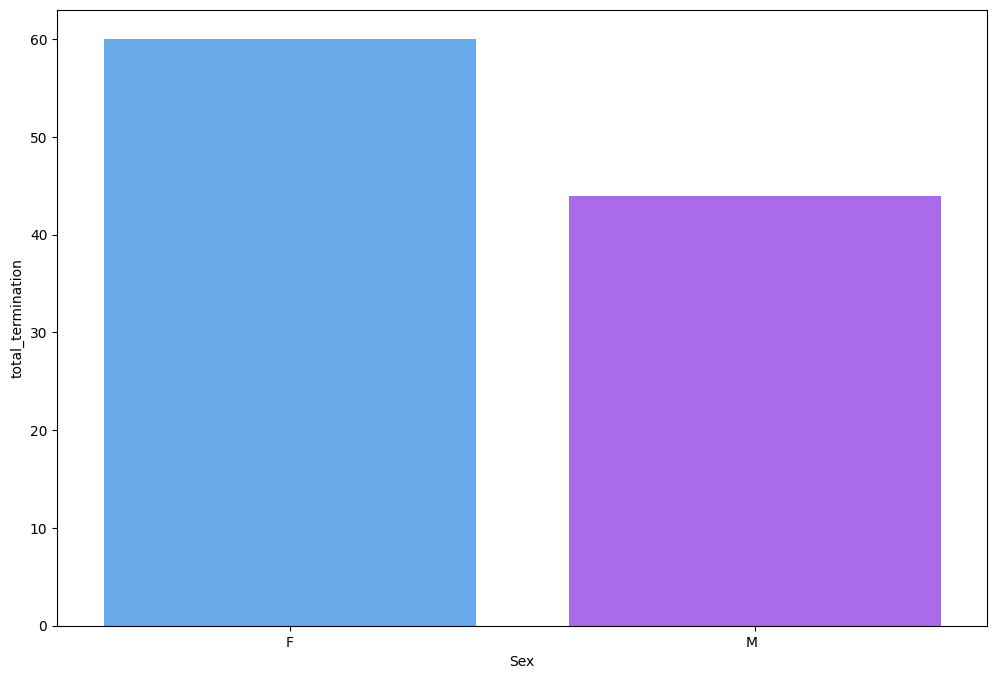

In [27]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

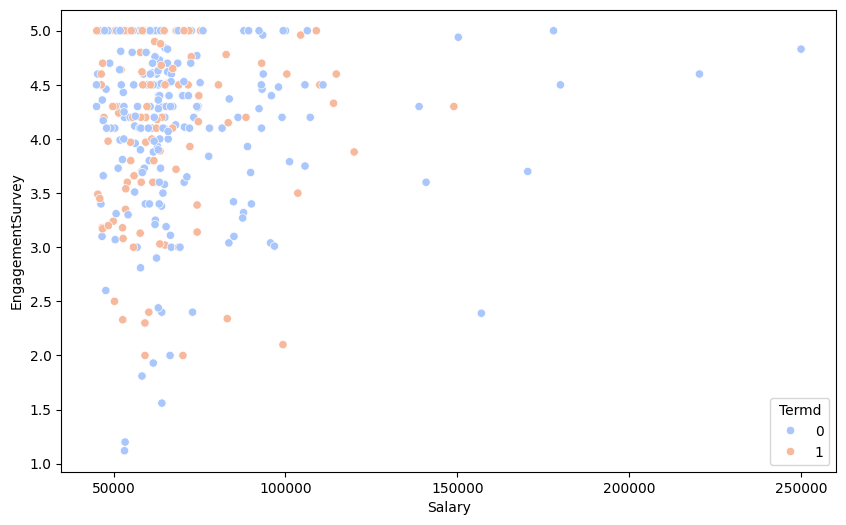

In [28]:
#code here
plt.figure(figsize=(10,6))
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data, palette='coolwarm')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

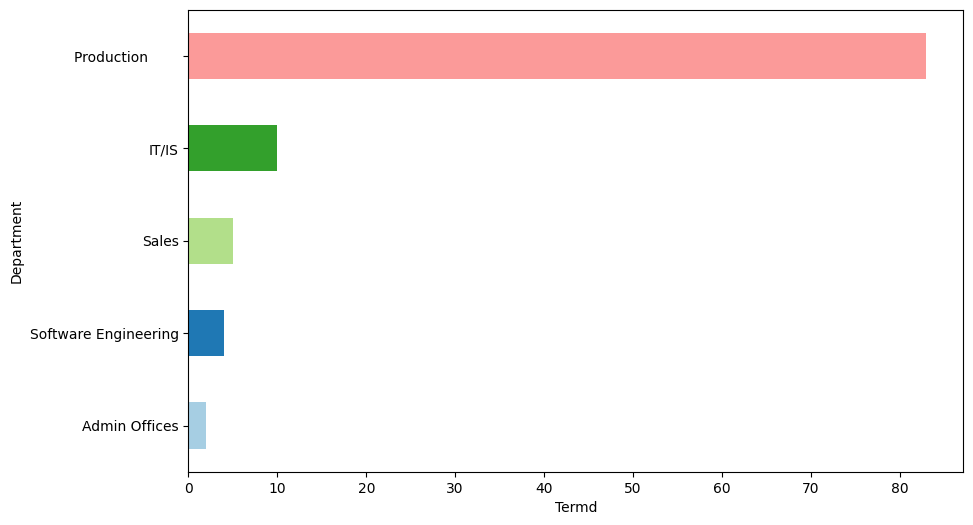

In [29]:
termination_by_department = data[data['Termd'] == 1].groupby('Department')['EmpID'].count().sort_values(ascending=True)
termination_by_department.plot(kind='barh', figsize=(10,6), color=plt.cm.Paired.colors)
plt.ylabel('Department')
plt.xlabel('Termd')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

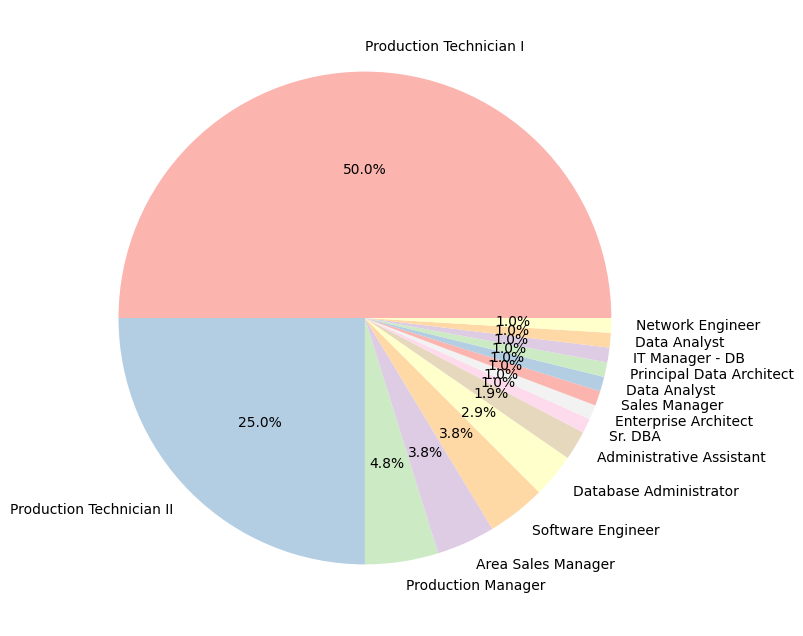

In [30]:
terminated_by_position = data[data['Termd'] == 1]['Position'].value_counts()
terminated_by_position.plot.pie(autopct='%1.1f%%', figsize=(8,8), colors=plt.get_cmap('Pastel1').colors)
plt.ylabel('')
plt.show()


9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

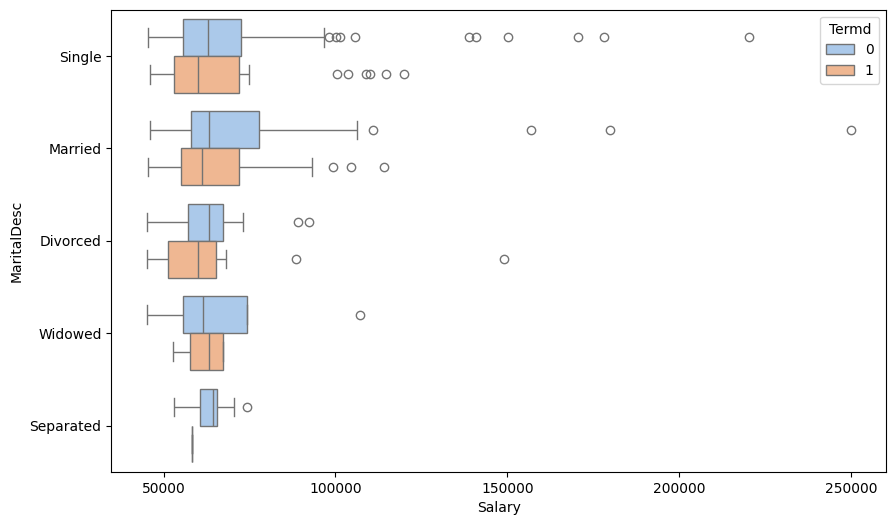

In [31]:
#code here
plt.figure(figsize=(10,6))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data, palette='pastel')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

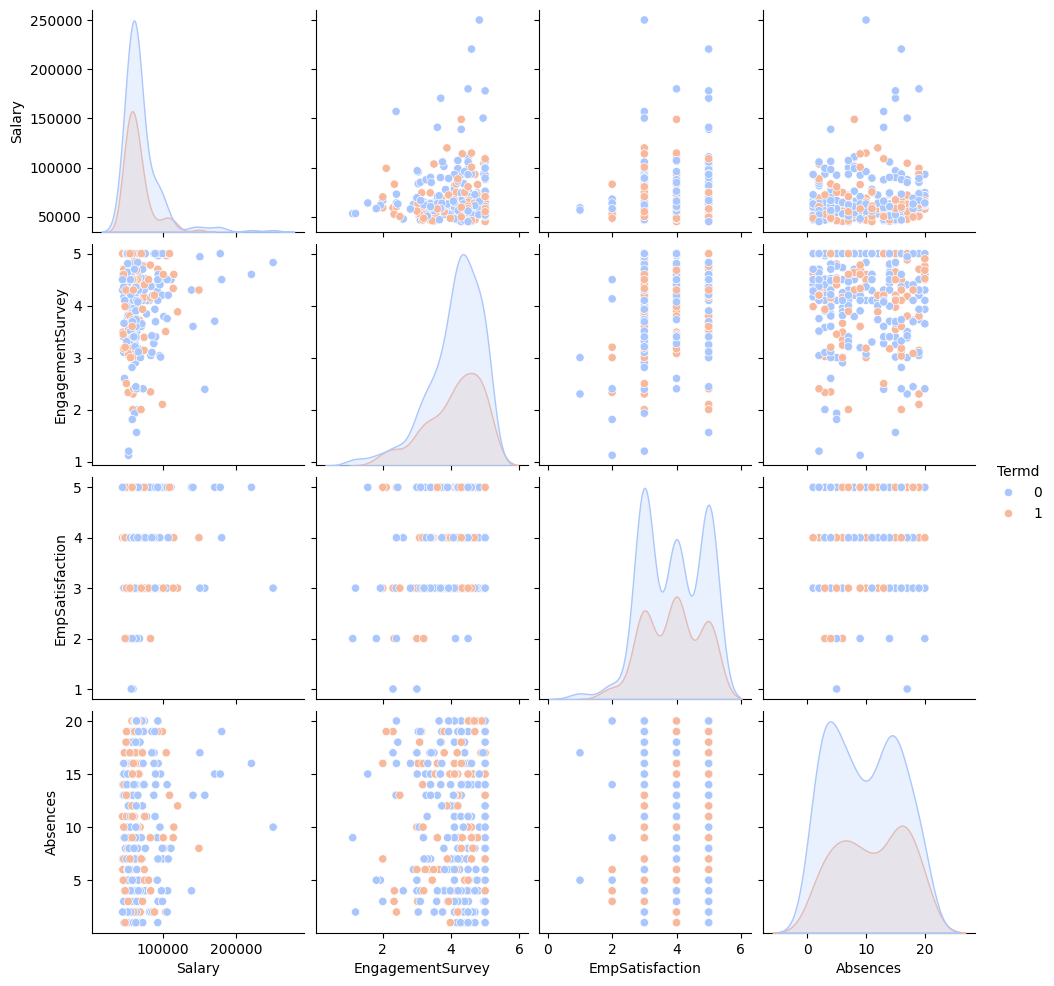

In [32]:
#codde here
sns.pairplot(data[['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences', 'Termd']], hue='Termd', palette='coolwarm')
plt.show()

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

11.Terdapat hubungan yang signifikan antara tempat seseorang bekerja, khususnya hubungan dengan manajer, dan skor kinerja karyawan. Beberapa penelitian menunjukkan bahwa lingkungan kerja sosial dan hubungan antara atasan dan bawahan berpengaruh positif terhadap kinerja karyawan.
Pengaruh Lingkungan Kerja Sosial
1. Lingkungan Kerja Sosial: Penelitian menunjukkan bahwa lingkungan kerja sosial yang baik, termasuk hubungan harmonis antara manajer dan karyawan, dapat meningkatkan kinerja. Dalam satu studi, ditemukan bahwa setiap peningkatan satu unit dalam lingkungan kerja sosial berhubungan dengan peningkatan skor kinerja sebesar 1.047 unit.
2. Skor Kinerja: Hasil analisis menunjukkan bahwa indikator hubungan antara atasan dengan bawahan memiliki skor tertinggi, yang berarti komunikasi yang baik antara pimpinan dan karyawan sangat mendukung kualitas kinerja.

Hubungan Antara Lingkungan Kerja dan Kinerja
1. Korelasi Positif: Penelitian lain menunjukkan bahwa ada korelasi sebesar 60,2% antara lingkungan kerja dengan kinerja karyawan, yang menandakan bahwa kondisi fisik dan sosial di tempat kerja berkontribusi signifikan terhadap produktivitas.


2. Analisis Regresi: Dalam studi yang berbeda, hasil analisis regresi menunjukkan hubungan positif yang kuat antara lingkungan kerja dan motivasi kerja, yang pada gilirannya mempengaruhi kinerja.

Kesimpulan
Secara keseluruhan, terdapat bukti empiris yang mendukung bahwa hubungan antara manajer dan karyawan serta lingkungan kerja sosial memiliki pengaruh positif terhadap skor kinerja. Kualitas interaksi ini sangat penting untuk menciptakan suasana kerja yang produktif dan memotivasi karyawan untuk mencapai hasil terbaik.


12.Sumber Rekrutmen                
Website Perusahaan: Memposting lowongan di situs resmi perusahaan untuk menarik kandidat yang sudah memahami budaya dan nilai perusahaan.                           

Employee Referral: Program di mana karyawan merekomendasikan kandidat, yang terbukti lebih cepat dan murah, serta menghasilkan karyawan berkualitas tinggi
LinkedIn: Platform profesional yang memungkinkan pencarian kandidat dengan latar belakang yang sesuai dan jaringan yang luas.  

Indeed: Situs pencari kerja yang populer, memungkinkan perusahaan untuk menjangkau berbagai kandidat dari berbagai latar belakang.                       

On-line Web Application: Aplikasi daring yang memudahkan proses pendaftaran dan pengumpulan data kandidat secara efisien.                               

CareerBuilder: Platform rekrutmen yang menyediakan akses ke berbagai kandidat dan alat untuk memfilter pelamar berdasarkan kualifikasi.                       
 |
Diversity Job Fair: Acara yang fokus pada keberagaman, membantu perusahaan menemukan kandidat dari berbagai latar belakang untuk menciptakan lingkungan kerja inklusif.

Google Search: Menggunakan pencarian online untuk menemukan kandidat potensial atau mempromosikan lowongan secara luas di internet.                             

Menggunakan kombinasi dari sumber-sumber ini dapat membantu perusahaan dalam merekrut karyawan berkualitas dengan rasio pemutusan kerja yang lebih rendah.


In [33]:
termination_ratio = data.groupby('RecruitmentSource')['Termd'].value_counts(normalize=True).unstack()
termination_ratio.columns = ['Not Terminated', 'Terminated']
termination_ratio['Termination Ratio'] = termination_ratio['Terminated'] / termination_ratio['Not Terminated']
termination_ratio = termination_ratio.fillna(termination_ratio['Termination Ratio'].mean())
termination_ratio = termination_ratio.sort_values(by='Termination Ratio')
termination_ratio

,Not Terminated,Terminated,Termination Ratio
RecruitmentSource,,,
Website,0.923077,0.076923,0.083333
Employee Referral,0.838710,0.161290,0.192308
LinkedIn,0.763158,0.236842,0.310345
Indeed,0.758621,0.241379,0.318182
On-line Web application,0.703819,1.000000,0.703819
CareerBuilder,0.521739,0.478261,0.916667
Other,0.500000,0.500000,1.000000
Diversity Job Fair,0.448276,0.551724,1.230769
Google Search,0.387755,0.612245,1.578947
